In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Load the dataset
data = pd.read_csv('delivery_time.csv')

In [3]:
# Display the first few rows of the dataset
print(data.head())

   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


In [4]:
# Check for missing values
print(data.isnull().sum())

Delivery Time    0
Sorting Time     0
dtype: int64


In [6]:
data.shape

(21, 2)

In [7]:
# Data Pre-processing
# Since the dataset is small, we'll assume there are no missing values or outliers to treat.

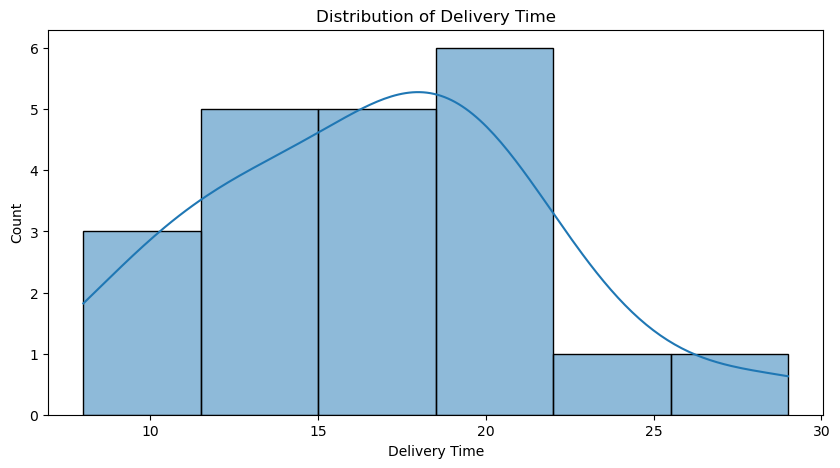

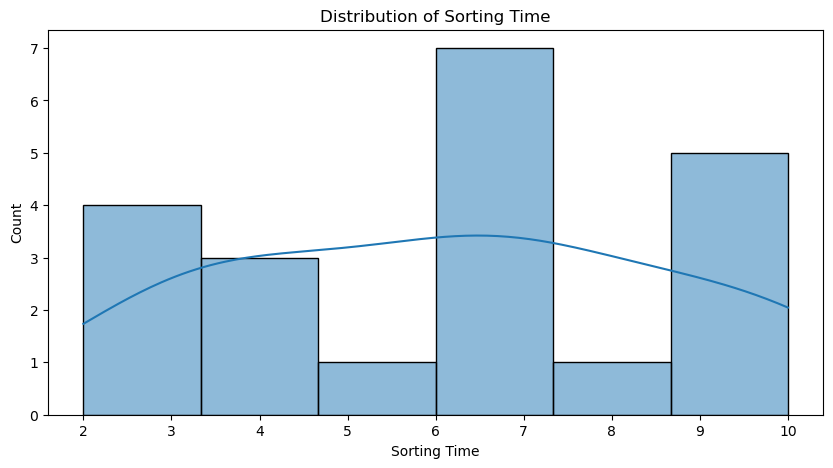

In [8]:
# Exploratory Data Analysis (EDA)
# Univariate analysis
plt.figure(figsize=(10, 5))
sns.histplot(data['Delivery Time'], kde=True)
plt.title('Distribution of Delivery Time')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data['Sorting Time'], kde=True)
plt.title('Distribution of Sorting Time')
plt.show()

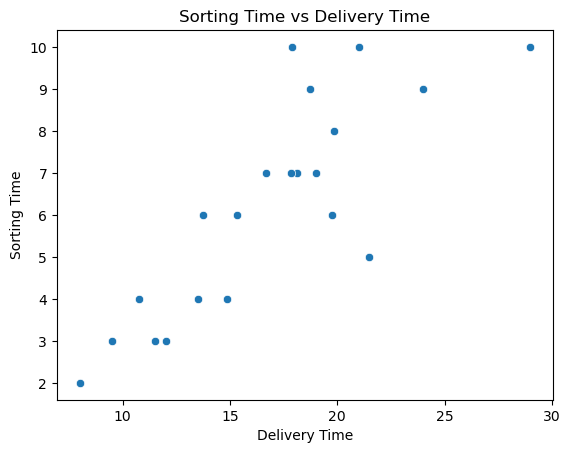

In [29]:
# Bivariate analysis
sns.scatterplot(x='Delivery Time', y='Sorting Time', data=data)
plt.title('Sorting Time vs Delivery Time')
plt.show()

In [35]:
# Model Building
# Simple Linear Regression model
X = data[['Delivery Time']]
y = data['Sorting Time']


In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Initialize the model
model = LinearRegression()

In [38]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Make predictions
y_pred = model.predict(X_test)

In [40]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Simple Linear Regression - RMSE: {rmse}, R-Squared: {r2}')

Simple Linear Regression - RMSE: 2.0713126959981585, R-Squared: 0.40411996047178333


In [41]:
# Log Transformation
X_log = np.log(X)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.2, random_state=42)

model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)

rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
r2_log = r2_score(y_test_log, y_pred_log)
print(f'Log Transformation - RMSE: {rmse_log}, R-Squared: {r2_log}')

Log Transformation - RMSE: 1.9884277107601194, R-Squared: 0.4508548943168432


In [42]:
# Polynomial Transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = model_poly.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f'Polynomial Transformation - RMSE: {rmse_poly}, R-Squared: {r2_poly}')

Polynomial Transformation - RMSE: 1.9492835907152517, R-Squared: 0.47226298374559095


In [43]:
# Choose the best fit model
best_model = min([(rmse, r2, 'Simple Linear Regression'), (rmse_log, r2_log, 'Log Transformation'), (rmse_poly, r2_poly, 'Polynomial Transformation')])

print(f'Best Model: {best_model[2]} with RMSE: {best_model[0]} and R-Squared: {best_model[1]}')


Best Model: Polynomial Transformation with RMSE: 1.9492835907152517 and R-Squared: 0.47226298374559095


In [ ]:
# Benefits/Impact of the solution
# This model helps the logistics company to optimize their sorting processes to reduce delivery time, 
#leading to improved efficiency and customer satisfaction.